## Problem Set 6 for MACS30150
### Dr. Richard Evans
### Submitted by Junho Choi

Before proceeding, let us import the necessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
import math
from sklearn.linear_model import LogisticRegression

### Problem 1

#### 1-(a)

Let us import the data first. It seems that there isn't much weirdness from the first inspection.

In [2]:
## raw read-in of the data
data = pd.read_csv("Auto.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Yet upon further inspection, there's that question mark for some of the values. So this must be the missing data.

In [3]:
## different from the first glance; there is that '?'
print(data['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54' '208'
 '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75' '91'
 '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115' '53'
 '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48' '66'
 '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64' '74'
 '116' '82']


Therefore let us re-read-in the data, and designate `?` as part of the `na_values`.

In [4]:
## re-read-in of the data
data = pd.read_csv("Auto.csv", na_values='?')
print(data['horsepower'].unique())

[ 130.  165.  150.  140.  198.  220.  215.  225.  190.  170.  160.   95.
   97.   85.   88.   46.   87.   90.  113.  200.  210.  193.   nan  100.
  105.  175.  153.  180.  110.   72.   86.   70.   76.   65.   69.   60.
   80.   54.  208.  155.  112.   92.  145.  137.  158.  167.   94.  107.
  230.   49.   75.   91.  122.   67.   83.   78.   52.   61.   93.  148.
  129.   96.   71.   98.  115.   53.   81.   79.  120.  152.  102.  108.
   68.   58.  149.   89.   63.   48.   66.  139.  103.  125.  133.  138.
  135.  142.   77.   62.  132.   84.   64.   74.  116.   82.]


#### 1-(b)

Below code presents the scatterplot matrix.

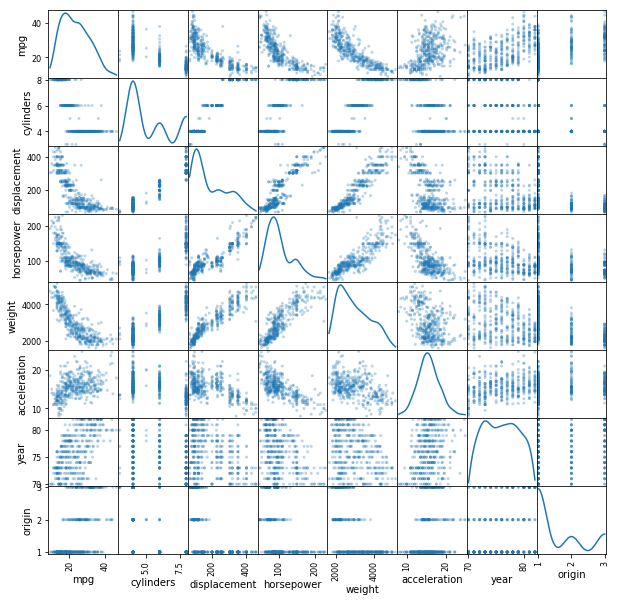

In [5]:
scatter_matrix(data, alpha=0.3, figsize=(10,10),
               diagonal='kde')
plt.show()

#### 1-(c)

Below code presents the correlation matrix for the quantitative variables.

In [6]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


#### 1-(d)

Let us first remove the rows with missing data.

In [7]:
data_nomiss = data.dropna()
data_nomiss.shape[0]

392

In [8]:
data_nomiss.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


Let us set up the dependent variable (`mpg_nm`) and the regressors (`X_nm`).

In [9]:
## nm for not missing
mpg_nm = data_nomiss['mpg'].values
X_nm = data_nomiss[['cylinders', 'displacement', 'horsepower', 'weight',
                    'acceleration', 'year', 'origin']].values

In [10]:
num_nm = X_nm.shape[0]
const_nm = np.ones(num_nm).reshape((num_nm, 1))
X_nm_w_const = np.hstack((const_nm, X_nm))
X_nm_w_const

array([[   1. ,    8. ,  307. , ...,   12. ,   70. ,    1. ],
       [   1. ,    8. ,  350. , ...,   11.5,   70. ,    1. ],
       [   1. ,    8. ,  318. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   1. ,    4. ,  135. , ...,   11.6,   82. ,    1. ],
       [   1. ,    4. ,  120. , ...,   18.6,   82. ,    1. ],
       [   1. ,    4. ,  119. , ...,   19.4,   82. ,    1. ]])

#### 1-(d)-i.

In the below OLS regression results table, $x1$ indicates cylinders, $x2$ displacement, $x3$ horsepower, $x4$ weight, $x5$ acceleration, $x6$ year, and $x7$ origin ($const$ obviously indicates constant). Therefore, the coefficients with statistical significance at $p=0.01$ (or 1% level) are those on displacement, weight, year, origin, and the constant (that is, $\beta_2, \beta_4, \beta_6, \beta_7$ and $\beta_0$ in the question's equation).

In [11]:
reg_nm = sm.OLS(endog=mpg_nm, exog=X_nm_w_const)
result1 = reg_nm.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        02:41:59   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2184      4.644     -3.707      0.0

#### 1-(d)-ii.

Again, referring to the above OLS results table, we see that coefficients on cylinders, horsepower, and acceleration have $p$-values that are greater than 0.1. Therefore, the said coefficients are __not__ statistically significant at the 10% level (which are $\beta_1, \beta_3$, and $\beta_5$ on the question's equation).

#### 1-(d)-iii.

Referring to the above OLS results table once again, the coefficient on year is (approximately) $0.7508$. This means that on average, one unit increase in vehicle year (i.e. if a vehicle is newer by a year) is associated with $0.7508$ unit increase in miles per gallon, or mpg.

#### 1-(e)

From the scatterplots in part (b) and also below (which is one that is partially reproduced), we can see that the three variables likely to have a nonlinear relationship with mpg is displacement, horsepower, and weight.

In [12]:
data_2 = \
    pd.DataFrame(data[['mpg', 'displacement', 'horsepower', 'weight']])

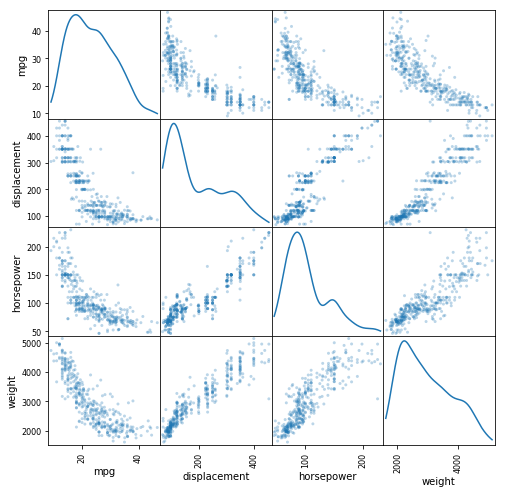

In [13]:
scatter_matrix(data_2, alpha=0.3, figsize=(8,8),
               diagonal='kde')
plt.show()

#### 1-(e)-i.

To start, let us create the variables which are the squared terms for displacement, horsepower, weight, and acceleration; these will be denoted `disp_sq`, `hp_sq`, `weight_sq`, and `accel_sq`, respectively.

In [14]:
## re-read-in of the data
data_for_sq = pd.read_csv("Auto.csv", na_values='?')
data_nomiss_sq = pd.DataFrame(data_for_sq.dropna())

In [15]:
data_nomiss_sq['disp_sq'] = (data_nomiss_sq['displacement']) ** 2
data_nomiss_sq['hp_sq'] = (data_nomiss_sq['horsepower']) ** 2
data_nomiss_sq['weight_sq'] = (data_nomiss_sq['weight']) ** 2
data_nomiss_sq['accel_sq'] = (data_nomiss_sq['acceleration']) ** 2

Let us now estimate a new multiple regression model by OLS using the above-created dataset. First we need to designate regressors and the dependent variables, and add the constant term.

In [16]:
X_nm_sq = data_nomiss_sq[['cylinders', 'displacement', 'horsepower', 
                          'weight', 'acceleration', 'year', 'origin',
                          'disp_sq', 'hp_sq', 'weight_sq', 'accel_sq']].values
y_nm_sq = data_nomiss_sq['mpg'].values

In [17]:
num_nm_sq = X_nm_sq.shape[0]
const_nm_sq = np.ones(num_nm_sq).reshape((num_nm_sq, 1))
X_nm_w_const_sq = np.hstack((const_nm_sq, X_nm_sq))
X_nm_w_const_sq

array([[  1.00000000e+00,   8.00000000e+00,   3.07000000e+02, ...,
          1.69000000e+04,   1.22780160e+07,   1.44000000e+02],
       [  1.00000000e+00,   8.00000000e+00,   3.50000000e+02, ...,
          2.72250000e+04,   1.36382490e+07,   1.32250000e+02],
       [  1.00000000e+00,   8.00000000e+00,   3.18000000e+02, ...,
          2.25000000e+04,   1.18060960e+07,   1.21000000e+02],
       ..., 
       [  1.00000000e+00,   4.00000000e+00,   1.35000000e+02, ...,
          7.05600000e+03,   5.26702500e+06,   1.34560000e+02],
       [  1.00000000e+00,   4.00000000e+00,   1.20000000e+02, ...,
          6.24100000e+03,   6.89062500e+06,   3.45960000e+02],
       [  1.00000000e+00,   4.00000000e+00,   1.19000000e+02, ...,
          6.72400000e+03,   7.39840000e+06,   3.76360000e+02]])

Below is the regression result. Note that $x1$ indicates cylinders, $x2$ displacement, $x3$ horsepower, $x4$ weight, $x5$ acceleration, $x6$ year, $x7$ origin, $x8$ displacement squared, $x9$ horsepower squared, $x10$ weight squared, and $x11$ acceleration squared ($const$ obviously indicates constant).

In [18]:
reg_nm_sq = sm.OLS(endog=y_nm_sq, exog=X_nm_w_const_sq)
result2 = reg_nm_sq.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        02:42:16   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1084      6.696      3.003      0.0

#### 1-(e)-ii.

Before, the adjusted $R^2$ statistic was found to be $0.818$. With the squared terms added, the adjusted $R^2$ statistic is found to be $0.866$. There is a slight improvement, therefore, for adjusted $R^2$.

#### 1-(e)-iii.

Prior to adding the squared terms, the statistical significance on the coefficient for displacement was found to be $0.008$ (in terms of $p$-value). However, after adding the squared terms, that changed to $0.408$, meaning that it is no longer significant at the $1\%$ level (not even at $10\%$ level as well). In addition, the statistical significance on the coefficient for displacement squared ($x8$ above) is found to be $0.532$, which is not significant at the $10\%$ level as well.

#### 1-(e)-iv.

Prior to adding the squared terms, the statistical significance on the coefficient for cylinders was found to be $0.128$ (in terms of $p$-value). Post-addition of squared terms, that changed to $0.440$. Both are not significant at the $10\%$ level, but one can say that the $p$-value worsened for the cylinders variable after adding the squared terms.

#### 1-(f)

From below, it is seen that with the parameters specified in the question the predicted mpg will be approximately $38.7321111$. Note that model year's input has been written as $99$ instead of $1999$ as all the observations for the year variable in the dataset are double-digited.

In [19]:
X_pred = [1, 6, 200, 100, 3100, 15.1, 99, 1, 200 ** 2, 100 ** 2, 3100 ** 2, 15.1 ** 2]
pred_mpg = result2.predict(X_pred)
pred_mpg

array([ 38.7321111])

### Problem 2

#### 2-(a)

Let us create the function for calculating the Euclidean distance.

In [20]:
def EuclideanDist(pt1, pt2):
    ## note that pt1 and pt2 have to be in numpy array format
    
    dist = (pt1 - pt2) * (pt1 - pt2)
    dist = dist.sum()
    dist = dist ** 0.5
    
    return dist

In [21]:
origin = np.array([0, 0, 0])
obs1 = np.array([0, 3, 0])
obs2 = np.array([2, 0, 0])
obs3 = np.array([0, 1, 3])
obs4 = np.array([0, 1, 2])
obs5 = np.array([-1, 0, 1])
obs6 = np.array([1, 1, 1])
obs_lst = [obs1, obs2, obs3, obs4, obs5, obs6]

for obs in obs_lst:
    print()
    print(EuclideanDist(origin, obs))


3.0

2.0

3.16227766017

2.2360679775

1.41421356237

1.73205080757


As seen from above, the Euclidean distance from $X_1 = X_2 = X_3 = 0$ to the observations 1 through 6 are $3$, $2$, $\sqrt{10}$ (or approximately $3.16$), $\sqrt{5}$ (or approximately $2.24$), $\sqrt{2}$ (or approximately $1.41$) and $\sqrt{3}$ (or approximately $1.73$).

#### 2-(b)

According to the above sub-question, the closest point to $(X_1, X_2, X_3)=(0, 0, 0)$ is the fifth observation, $(X_1, X_2, X_3)=(-1, 0, 1)$. Therefore, the KNN prediction with $K=1$ would be __green__.

#### 2-(c)

From before, we can see that the closest three points to $(X_1, X_2, X_3)=(0, 0, 0)$ are the second, fifth, and sixth observation, two of which are red and one of which are green. Therefore, the KNN prediction with $K=3$ would be __red__.

#### 2-(d)

As in the ``LogitKNN`` notebook that we looked at in class, if the Bayes decision boundary is highly nonlinear, an extremely large value for $K$ would be underfitting and/or ignoring information. On the other hand, if very small, KNN classifier would be overfitting the data. However, it would be better to have a moderately smaller (than larger) value of $K$ than to have something that is extreme on either side.

#### 2-(e)

Let us first set up the training data and the target values. In the below code, note that `R` refers to red and `G` refers to green.

In [22]:
obs_array = np.array(obs_lst)
print(obs_array)
y_array = ['R','R','R','G','G','R']
print()
print(y_array)

[[ 0  3  0]
 [ 2  0  0]
 [ 0  1  3]
 [ 0  1  2]
 [-1  0  1]
 [ 1  1  1]]

['R', 'R', 'R', 'G', 'G', 'R']


Now let us run the KNN classifier provided from `scikit-learn`, and predict the label for $(X_1, X_2, X_3) = (1, 1, 1)$.

In [23]:
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=2)
knn_fit = knn_2.fit(obs_array, y_array)

In [24]:
test_array = np.array([[1, 1, 1]])
knn_fit.predict(test_array)

array(['G'], 
      dtype='<U1')

Surprisingly, it is seen that despite $(X_1, X_2, X_3) = (1, 1, 1)$ being the sixth observation labelled with __red__, the classification is actually show to be __green__. To dig deeper, let us examine what the closest observations to $(X_1, X_2, X_3) = (1, 1, 1)$ are.

In [25]:
for obs in obs_lst:
    print()
    print(EuclideanDist(np.array([1, 1, 1]), obs))


2.44948974278

1.73205080757

2.2360679775

1.41421356237

2.2360679775

0.0


It is seen that the sixth (which is the said point itself) and fourth points are the closest ones to $(X_1, X_2, X_3) = (1, 1, 1)$. With one observation being labelled green and the other red, the KNN classifier may not be able to make the decision without some sort of tie-breaking rule. The third observation closest to $(X_1, X_2, X_3) = (1, 1, 1)$ is the second observation, labelled red. Therefore, it must not be that the tie-breaking rule is incorporating one more closest point to the classifier.

In [26]:
alphabets_a_to_l_without_g = ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'L']
for alphabet in alphabets_a_to_l_without_g:
    y_array_try = [alphabet, alphabet, alphabet, 'G', 'G', alphabet]
    knn_fit_try = knn_2.fit(obs_array, y_array_try)
    pred = knn_fit_try.predict(test_array)
    print(pred)

['A']
['B']
['C']
['D']
['E']
['F']
['G']
['G']
['G']
['G']
['G']


But notice the code chunk above. It seems that the tie-breaking rule is simply that if a letter (or string variable) precedes another, that letter is chosen as a tie-breaker. Because `R` succeeds `G` in Python and in the actual alphabet, it was not chosen (or at least this is my conjecture). Therefore, while the classifier says it is __green__, we should keep in mind that both are possible answers (or because the point is the sixth observation, perhaps more towards __red__ than green).

### Problem 3

For this problem, let us use the data without missing values once more. I had named it `data_nomiss` above.

#### 3-(a)

Firstly, let us try to find the median for the variable mpg in `data_nomiss`. It turns out that the said median is 22.75.

In [27]:
median_mpg = data_nomiss['mpg'].median()
print(median_mpg)

22.75


Now let us create the variable `mpg_high` as directed from the question.

In [28]:
data_nomiss = pd.DataFrame(data_nomiss) ## needs to be on a new dataframe
data_nomiss['mpg_high'] = 0             ## initializing things to 0
rowcnd = data_nomiss.mpg >= median_mpg  ## row condition for mpg_high
data_nomiss.loc[rowcnd, 'mpg_high'] = 1 ## above or equal to median = 1
data_nomiss.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high
387,26.0,4,156.0,92.0,2585,14.5,82,1,chrysler lebaron medallion,1
388,22.0,6,232.0,112.0,2835,14.7,82,1,ford granada l,0
389,32.0,4,144.0,96.0,2665,13.9,82,3,toyota celica gt,1
390,36.0,4,135.0,84.0,2370,13.0,82,1,dodge charger 2.2,1
391,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro,1
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1
396,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10,1


Let us prepare for the dependent variable and the regressors.

In [29]:
y_logit = data_nomiss['mpg_high'].values
x_logit = data_nomiss[['cylinders', 'displacement', 'horsepower', 'weight',
                       'acceleration', 'year', 'origin']].values

## h-stacking the constant terms
const_nm = np.ones(num_nm).reshape((num_nm, 1))
x_logit_with_const = np.hstack((const_nm, x_logit))
x_logit_with_const

array([[   1. ,    8. ,  307. , ...,   12. ,   70. ,    1. ],
       [   1. ,    8. ,  350. , ...,   11.5,   70. ,    1. ],
       [   1. ,    8. ,  318. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   1. ,    4. ,  135. , ...,   11.6,   82. ,    1. ],
       [   1. ,    4. ,  120. , ...,   18.6,   82. ,    1. ],
       [   1. ,    4. ,  119. , ...,   19.4,   82. ,    1. ]])

Let us run the logistic regression.

In [30]:
logit = sm.Logit(y_logit, x_logit_with_const)
logit_stats = logit.fit()
print(logit_stats.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        02:42:49   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.

Note that $x1$, $x2$, $x3$, $x4$, $x5$, $x6$, and $x7$ in the table above refer to cylinders, displacement, horsepower, weight, acceleration, year, and origin respectively (and $const$ referring to the constant term). We see that among the regressors (excluding the constant term), those that have statistically significant coefficients at the 5% (or $p$-value of 0.05) level are __weight__ and __year__.

#### 3-(b)

I have split the data into training and testing datasets as directed by the question using below code chunk.

In [31]:
X_train, X_test, y_train, y_test = \
    train_test_split(x_logit_with_const, y_logit, test_size = 0.5, random_state=10)

#### 3-(c)

In [32]:
LogReg = LogisticRegression()
fitted_train_LogReg = LogReg.fit(X_train, y_train)
fitted_train_LogReg.coef_

array([[-0.07022621, -0.67604786,  0.00608728, -0.03802261, -0.00505466,
        -0.13489425,  0.29986833, -0.15403736]])

And as seen from the above code chunk's output, we can see that:


$$(\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5, \beta_6, \beta_7) \approx (-0.0702, -0.6760, 0.0061, -0.0380, -0.0051, -0.1349, 0.2999, -0.1540)$$

in which the numbers have been rounded up to the nearest ten-thousandth.

#### 3-(d)

After producing the predicted dependent variables using the code chunk directly below, I have also produced the confusion matrix as follows.

In [33]:
y_pred = LogReg.predict(X_test)

In [34]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix_)

Confusion matrix:
[[86 13]
 [12 85]]


As seen from below, in the test data for the dependent variable, there were 99 observations with `mpg_high = 0` and 97 observations with `mpg_high = 1`. Therefore, we can see that out of the 99 with `mpg_high = 0` in the test data, the logistic regression classifier has correctly classified 86 of them, which is approximately $86.87\%$. On the other hand, out of the 97 with `mpg_high = 1` in the test data, the logistic regression classifier has correctly classified 85 of them, which is approximately $87.63\%$. This would be comparison via "recall" or "true positive rate."

In [35]:
print("# of test y-data = 0:", sum(y_test == 0), "; # of test y-data = 1:", sum(y_test == 1))

# of test y-data = 0: 99 ; # of test y-data = 1: 97


In [36]:
print("Recall for low mpg")
print(confusion_matrix_[0][0] / sum(y_test == 0) * 100)
print()
print("Recall for high mpg")
print(confusion_matrix_[1][1] / sum(y_test == 1) * 100)

Recall for low mpg
86.8686868687

Recall for high mpg
87.6288659794


On the other hand, one can also calculate the "precision," in which the model has predicted 98 observations as having low mpg, but only 86 are actually so (approximately $87.75\%$). Similarly, 98 observations are classified as having high mpg, but only 85 are actually so (approximately $86.73\%$). So in terms of recall, the model is very slightly better at predicting high mpg, but with precision it is slightly better at predicting low mpg.

However, if one were to calculate the $F1$ score (i.e. the harmonic mean of precision and recall), we would have $87.31\%$ for low mpg and $87.18%$ for high mpg (approximate values). This, again, is very close to one another. Therefore, I conclude that the model is approximately equally good at prediction of low and high mpg.